In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
# ------------------------------
# CONFIGURACIÓN Y BUENAS PRÁCTICAS
# ------------------------------

# Configuración de pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Definir rutas de los archivos de datos
csv_path = r"G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\data\bank-additional.csv"
excel_path = r"G:\Mi unidad\DATA ANALYST - THEPOWER\DATA ANALYST\PYTHON\PANDAS\DatosProyecto\data\customer-details.xlsx"
backup_path = "backup/"

# Crear carpeta de respaldo si no existe
if not os.path.exists(backup_path):
    os.makedirs(backup_path)

In [9]:
# ------------------------------
# CARGA DE DATOS CON CONTROL DE ERRORES Y CORRECCIÓN DE FORMATO
# ------------------------------
try:
    print("\n📌 Cargando datos de marketing...")
    bank_df = pd.read_csv(csv_path, sep=None, engine='python', skipinitialspace=True)
    print("\n📌 Columnas detectadas en bank_df:", bank_df.columns)
    bank_df.columns = bank_df.columns.str.strip().str.replace(',', '').str.replace(' ', '_')
    print("✅ Datos de marketing cargados correctamente con columnas corregidas.")
except Exception as e:
    raise Exception(f"❌ ERROR al cargar datos de marketing: {e}")

try:
    print("\n📌 Verificando hojas disponibles en el archivo Excel...")
    xls = pd.ExcelFile(excel_path)
    print("📌 Hojas detectadas:", xls.sheet_names)
    
    print("\n📌 Cargando datos de clientes...")
    if '2012' in xls.sheet_names and '2013' in xls.sheet_names and '2014' in xls.sheet_names:
        customer_2012 = pd.read_excel(excel_path, sheet_name='2012')
        customer_2013 = pd.read_excel(excel_path, sheet_name='2013')
        customer_2014 = pd.read_excel(excel_path, sheet_name='2014')
        print("✅ Datos de clientes cargados correctamente.")
    else:
        raise Exception("❌ ERROR: No se encontraron las hojas esperadas (2012, 2013, 2014) en el archivo Excel.")
except Exception as e:
    raise Exception(f"❌ ERROR al cargar datos de clientes: {e}")

# Crear copias de seguridad de los datos originales
bank_df.to_csv(os.path.join(backup_path, "bank_backup.csv"), index=False)
customer_2012.to_csv(os.path.join(backup_path, "customer_2012_backup.csv"), index=False)
customer_2013.to_csv(os.path.join(backup_path, "customer_2013_backup.csv"), index=False)
customer_2014.to_csv(os.path.join(backup_path, "customer_2014_backup.csv"), index=False)

print("✅ Copias de seguridad creadas en 'backup/'.")



📌 Cargando datos de marketing...

📌 Columnas detectadas en bank_df: Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude', 'id_'],
      dtype='object')
✅ Datos de marketing cargados correctamente con columnas corregidas.

📌 Verificando hojas disponibles en el archivo Excel...
📌 Hojas detectadas: ['2012', '2013', '2014']

📌 Cargando datos de clientes...
✅ Datos de clientes cargados correctamente.
✅ Copias de seguridad creadas en 'backup/'.


In [11]:
# ------------------------------
# UNIFICACIÓN DE DATOS
# ------------------------------
# Unir los datos de clientes en un solo DataFrame
customer_df = pd.concat([customer_2012, customer_2013, customer_2014], ignore_index=True)

# Asegurar que la columna 'id_' esté bien definida antes de fusionar
bank_df.columns = bank_df.columns.str.strip()
customer_df.columns = customer_df.columns.str.strip()

# Corregir nombres de columnas en customer_df si 'ID' existe en lugar de 'id_'
if 'ID' in customer_df.columns:
    customer_df.rename(columns={'ID': 'id_'}, inplace=True)

print("\n📌 Verificando columnas antes de la fusión:")
print("Columnas en bank_df:", bank_df.columns)
print("Columnas en customer_df:", customer_df.columns)

if 'id_' in bank_df.columns and 'id_' in customer_df.columns:
    merged_df = pd.merge(bank_df, customer_df, on='id_', how='left')
    print("✅ Datos fusionados correctamente.")
else:
    raise Exception("❌ ERROR: La columna 'id_' no se encuentra en uno de los DataFrames.")


📌 Verificando columnas antes de la fusión:
Columnas en bank_df: Index(['Unnamed:_0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude', 'id_'],
      dtype='object')
Columnas en customer_df: Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'id_'],
      dtype='object')
✅ Datos fusionados correctamente.


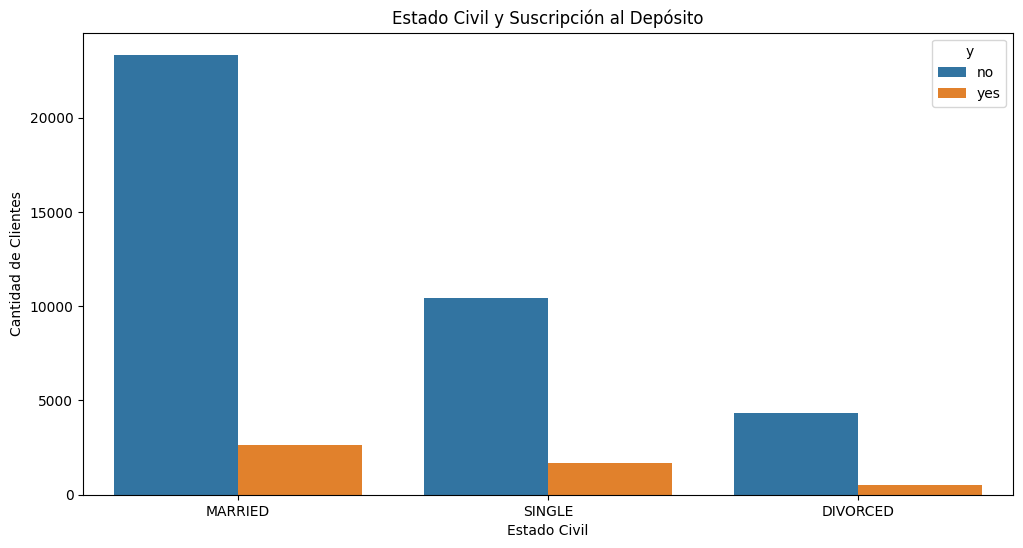

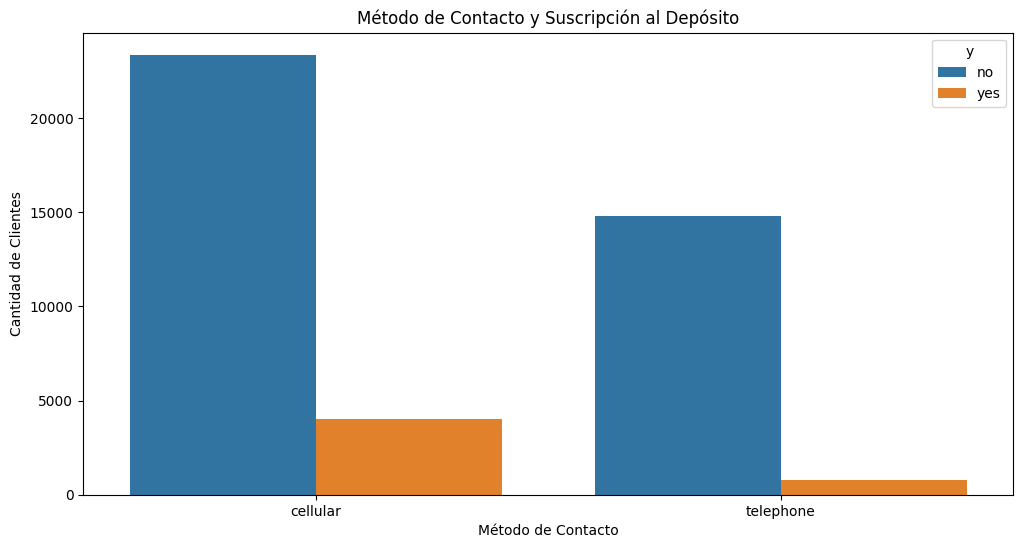

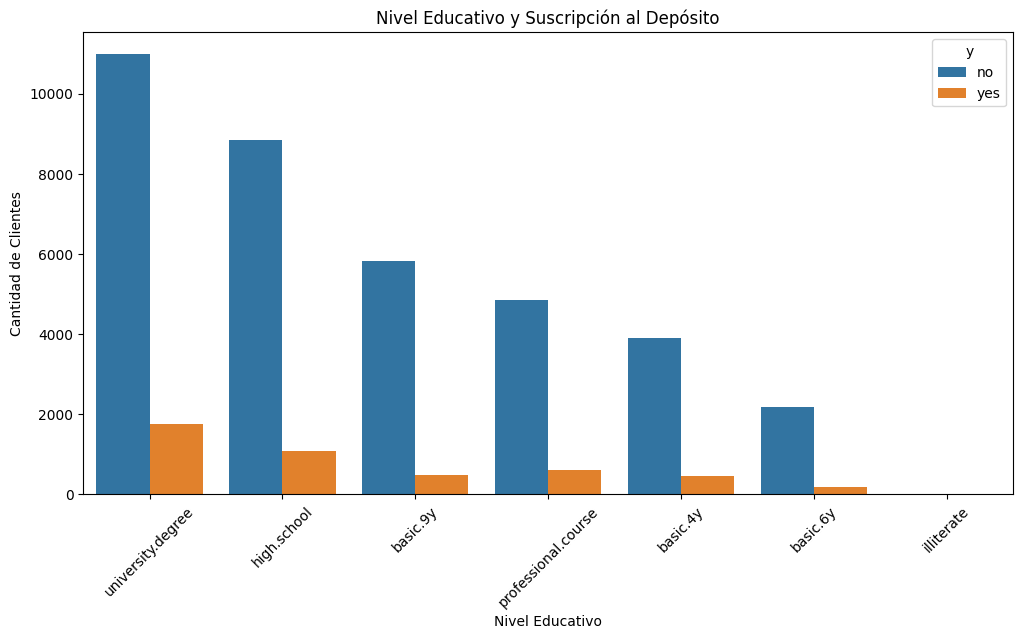

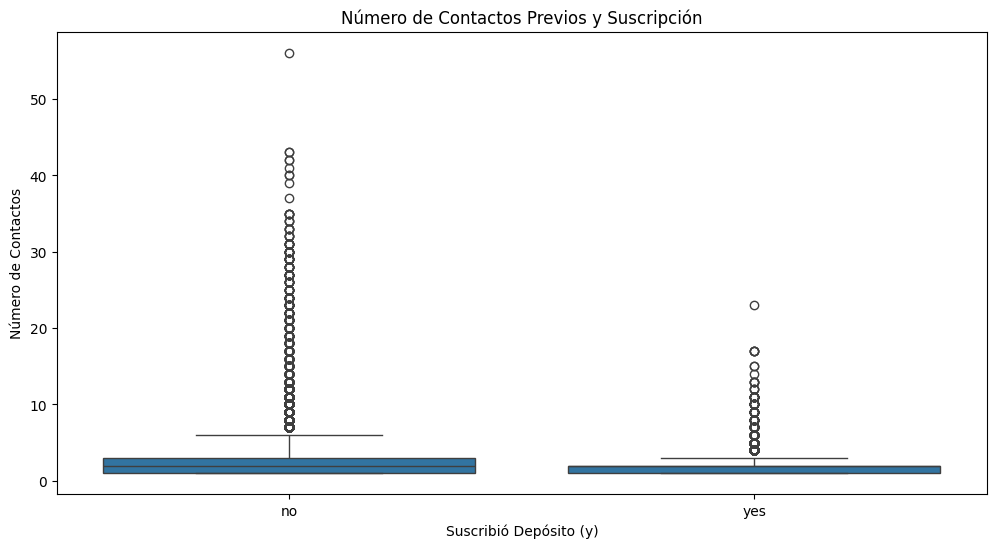

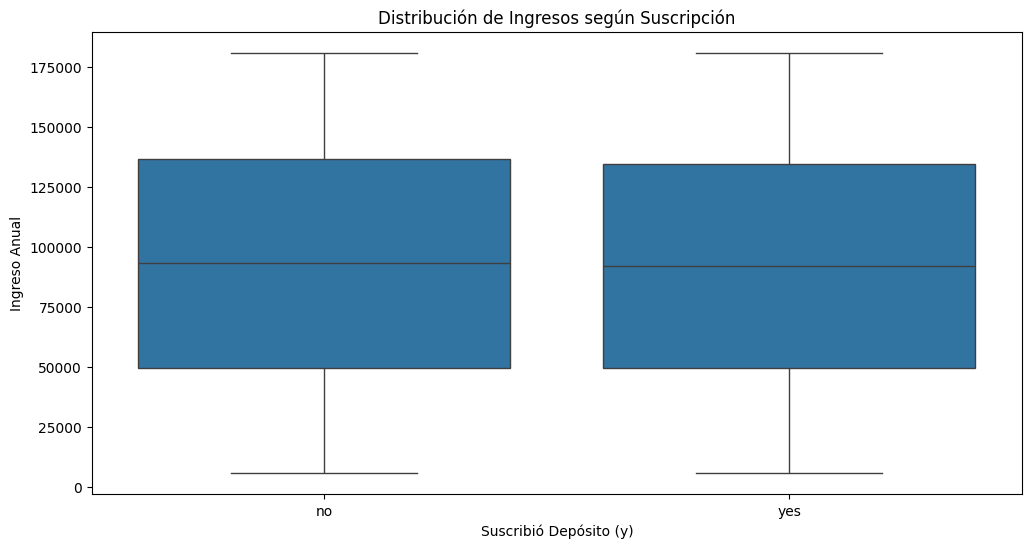

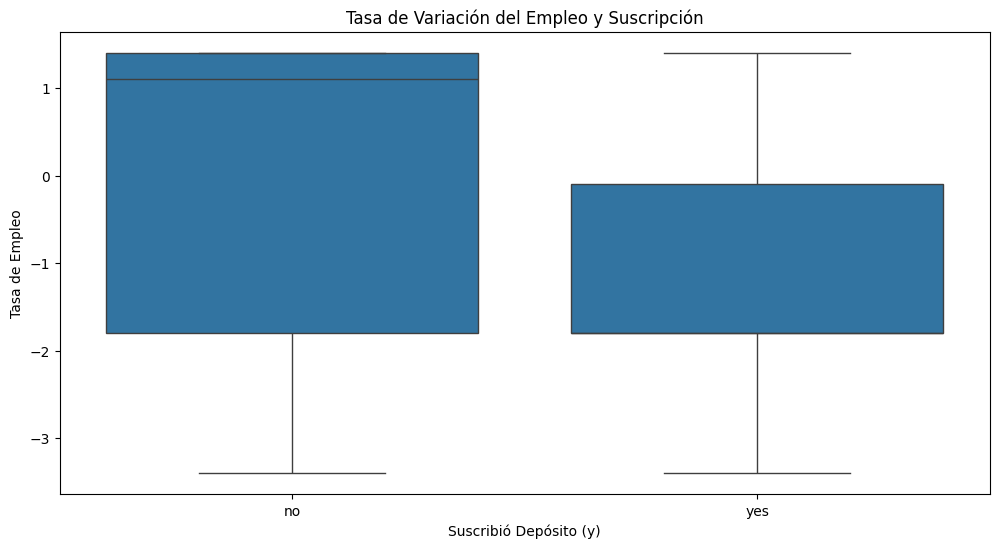

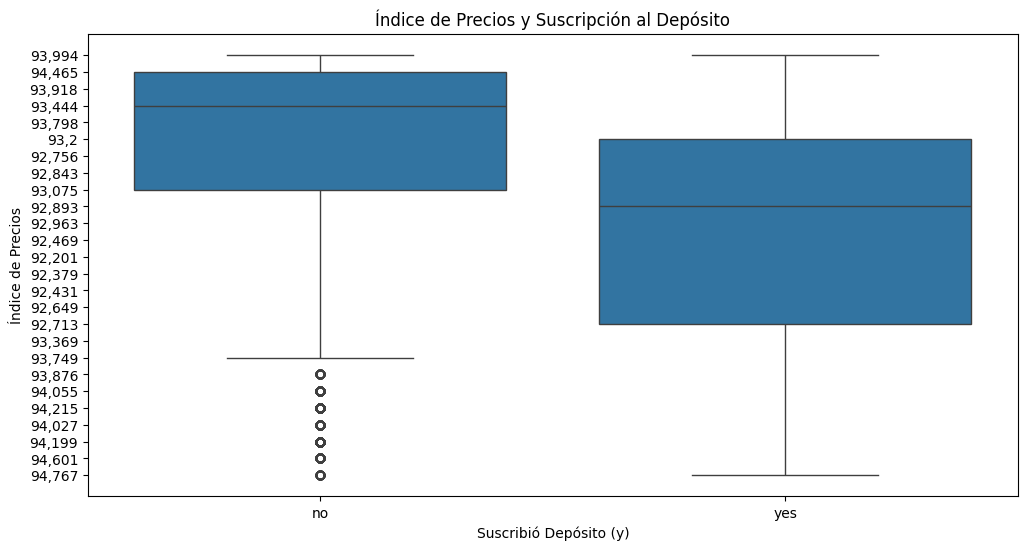

✅ Análisis exploratorio de datos completado con nuevas relaciones.


In [13]:
# ------------------------------
# ANÁLISIS ADICIONAL DE RELACIONES ENTRE VARIABLES
# ------------------------------

# Estado civil y suscripción
plt.figure(figsize=(12, 6))
sns.countplot(x='marital', hue='y', data=merged_df, order=merged_df['marital'].value_counts().index)
plt.title('Estado Civil y Suscripción al Depósito')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.show()

# Tipo de contacto y éxito
plt.figure(figsize=(12, 6))
sns.countplot(x='contact', hue='y', data=merged_df, order=merged_df['contact'].value_counts().index)
plt.title('Método de Contacto y Suscripción al Depósito')
plt.xlabel('Método de Contacto')
plt.ylabel('Cantidad de Clientes')
plt.show()

# Nivel educativo y suscripción
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='y', data=merged_df, order=merged_df['education'].value_counts().index)
plt.title('Nivel Educativo y Suscripción al Depósito')
plt.xlabel('Nivel Educativo')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

# Número de contactos previos y éxito
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='campaign', data=merged_df)
plt.title('Número de Contactos Previos y Suscripción')
plt.xlabel('Suscribió Depósito (y)')
plt.ylabel('Número de Contactos')
plt.show()

# Relación entre ingresos y suscripción
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='Income', data=merged_df)
plt.title('Distribución de Ingresos según Suscripción')
plt.xlabel('Suscribió Depósito (y)')
plt.ylabel('Ingreso Anual')
plt.show()

# Tasa de empleo y suscripción
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='emp.var.rate', data=merged_df)
plt.title('Tasa de Variación del Empleo y Suscripción')
plt.xlabel('Suscribió Depósito (y)')
plt.ylabel('Tasa de Empleo')
plt.show()

# Índice de precios y suscripción
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='cons.price.idx', data=merged_df)
plt.title('Índice de Precios y Suscripción al Depósito')
plt.xlabel('Suscribió Depósito (y)')
plt.ylabel('Índice de Precios')
plt.show()

print("✅ Análisis exploratorio de datos completado con nuevas relaciones.")
